# $\textbf{Assignment 1}$

## $\text{Importing necessary libraries}$

In [37]:
import numpy as np
import matplotlib.pyplot as plt

## $\text{Problem 1}$

In [38]:
def func_1(x,y):
    return -x*y

In [39]:
def euler(x,i1,function):
    y = np.zeros(len(x))
    h = x[1] - x[0]

    y[0] = i1

    for i in range(len(x)-1):
        y[i+1] = y[i] + (h*(function(x[i],y[i])))

    return y


In [40]:
def rk2(x,i1,function):
    y = np.zeros(len(x))
    h = x[1] - x[0]
    y[0] = i1

    for i in range(len(x)-1):
        k1 = h*function(x[i],y[i])
        k2 = h*function(x[i] + (0.5*h),y[i] + (0.5*k1))

        y[i+1] = y[i] + k2

    return y

In [41]:
def rk4(x,i1,function):
  y = np.zeros(len(x))
  h = x[1] - x[0]
  y[0] = i1

  for i in range(len(x)-1):
    k1 = h*function(x[i],y[i])
    k2 = h*function(x[i] + (0.5*h),y[i] + (0.5*k1))
    k3 = h*function(x[i] + (0.5*h),y[i] + (0.5*k2))
    k4 = h*function(x[i] + h,y[i] + k3)

    y[i+1] = y[i] + (1/6)*(k1+(2*k2)+(2*k3)+k4)

  return y

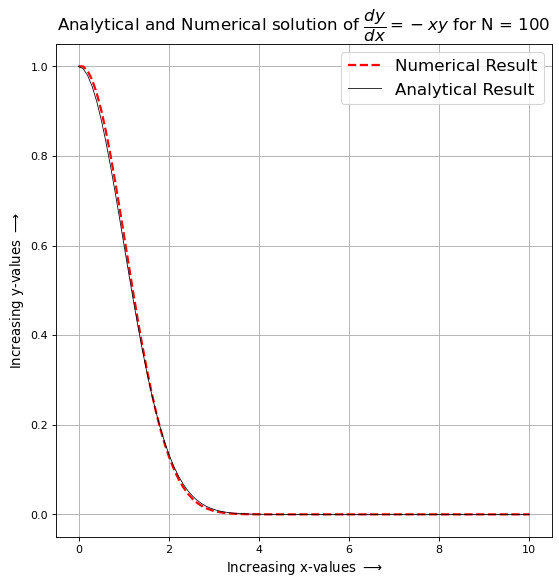

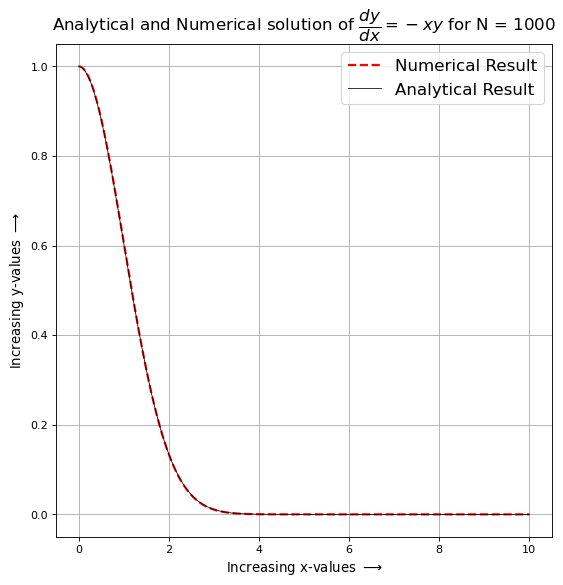

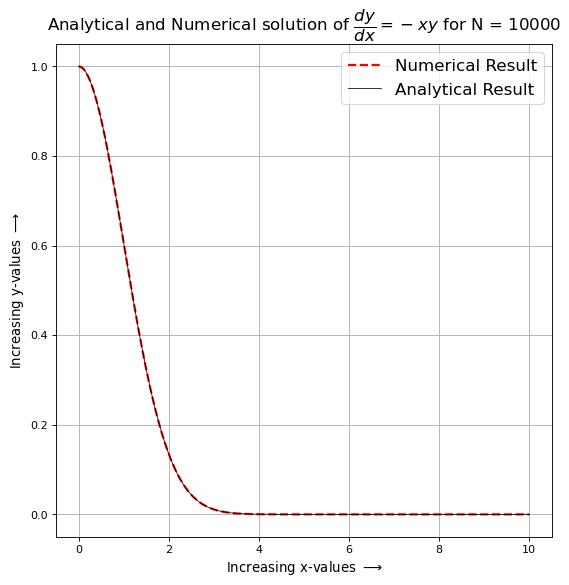

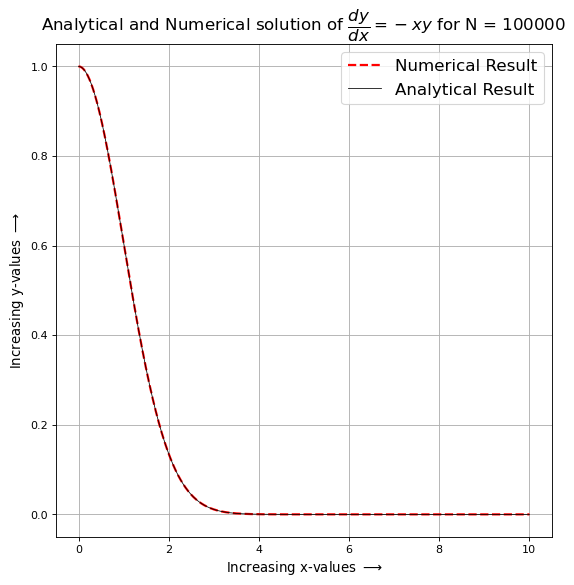

In [42]:
N = np.array([100,1000,10000,100000])
l1_arr = np.array([])
l2_arr = np.array([])

for n in N:
    x_vals = np.linspace(0,10,n)
    y_num = euler(x_vals,1,func_1)
    y_ana = np.exp(-(x_vals**2)/2)
    
    l1 = np.sum(abs(y_ana - y_num))/n
    l1_arr = np.append(l1_arr,l1)
    l2 = np.sqrt(np.sum((y_ana - y_num)**2)/n)
    l2_arr = np.append(l2_arr,l2)

    plt.figure(figsize=(8,8),dpi=80)
    plt.plot(x_vals,y_num,'r--',lw=2,label="Numerical Result")
    plt.plot(x_vals,y_ana,'k-',lw=0.7,label="Analytical Result")
    plt.xlabel("Increasing x-values $\longrightarrow$",fontsize=12)
    plt.ylabel("Increasing y-values $\longrightarrow$",size = 12)
    plt.grid()
    plt.title("Analytical and Numerical solution of $\dfrac{dy}{dx} = -xy$ for N = %d" %n,fontsize=15)
    plt.legend(prop={'size': 15})

In [43]:
print(l1_arr)

[3.30824968e-03 3.16935036e-04 3.15571589e-05 3.15435253e-06]


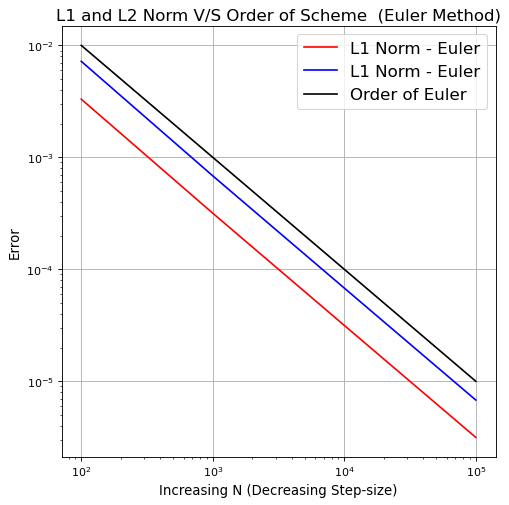

In [44]:
plt.figure(figsize=(7,7),dpi=80)
plt.plot(N,l1_arr,'r',label='L1 Norm - Euler')
plt.plot(N,l2_arr,'b',label='L1 Norm - Euler')
plt.plot(N,1/N,'k',label='Order of Euler')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Increasing N (Decreasing Step-size)",size=12)
plt.ylabel("Error",size=12)
plt.title("L1 and L2 Norm V/S Order of Scheme  (Euler Method)",size=15)
plt.grid()
plt.legend(prop={'size': 15})

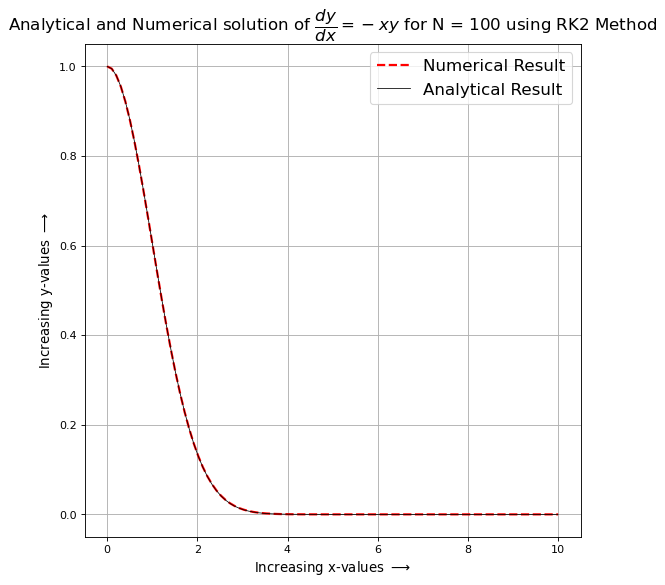

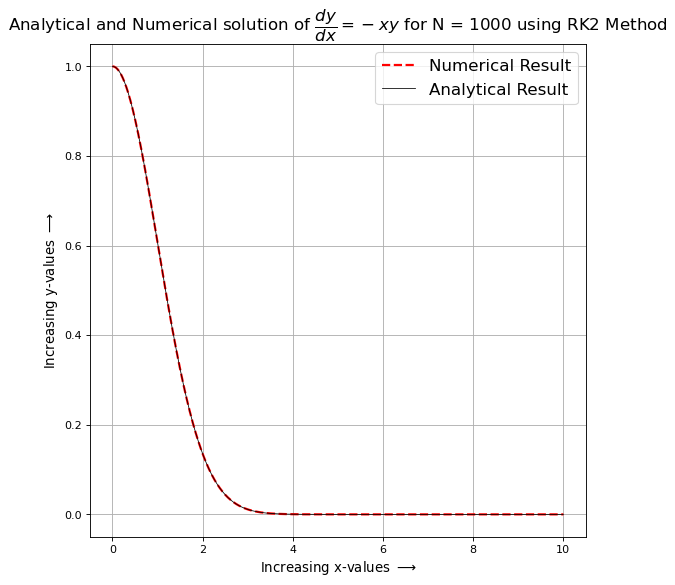

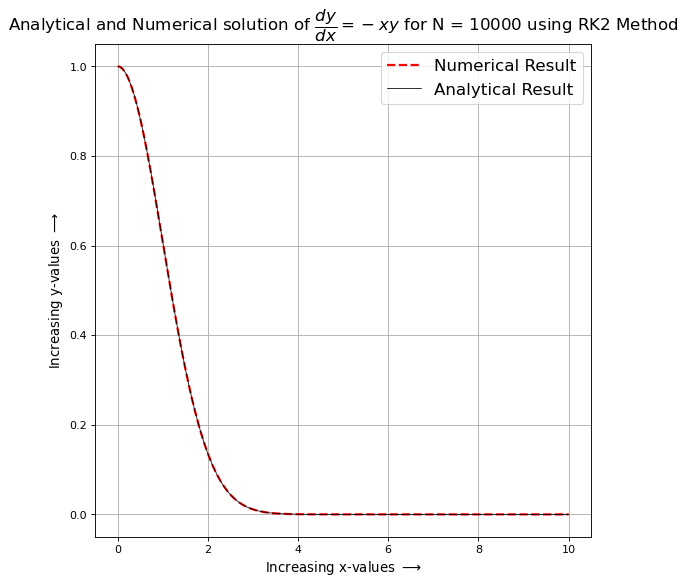

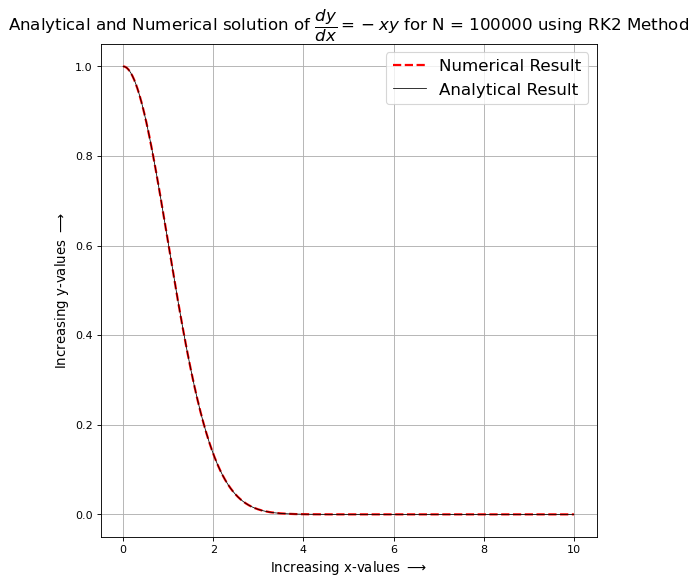

In [45]:
N = np.array([100,1000,10000,100000])
l1_arr_rk = np.array([])
l2_arr_rk = np.array([])

for n in N:
    x_vals = np.linspace(0,10,n)
    y_num = rk2(x_vals,1,func_1)
    y_ana = np.exp(-(x_vals**2)/2)
    
    l1 = np.sum(abs(y_ana - y_num))/n
    l1_arr_rk = np.append(l1_arr_rk,l1)
    l2 = np.sqrt(np.sum((y_ana - y_num)**2)/n)
    l2_arr_rk = np.append(l2_arr_rk,l2)

    plt.figure(figsize=(8,8),dpi=80)
    plt.plot(x_vals,y_num,'r--',lw=2,label="Numerical Result")
    plt.plot(x_vals,y_ana,'k-',lw=0.7,label="Analytical Result")
    plt.xlabel("Increasing x-values $\longrightarrow$",fontsize=12)
    plt.ylabel("Increasing y-values $\longrightarrow$",size = 12)
    plt.grid()
    plt.title("Analytical and Numerical solution of $\dfrac{dy}{dx} = -xy$ for N = %d using RK2 Method" %n,fontsize=15)
    plt.legend(prop={'size': 15})

In [46]:
print(l1_arr_rk)

[1.09710121e-04 9.77715900e-07 9.67322505e-09 9.66294167e-11]


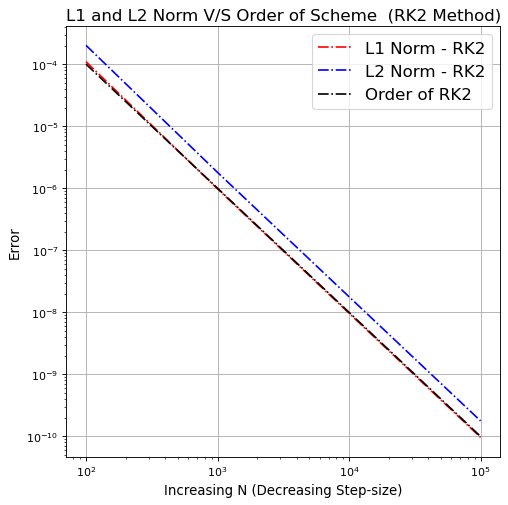

In [47]:
plt.figure(figsize=(7,7),dpi=80)
# plt.plot(N,l1_arr,'r',label='L1 Norm - Euler')
# plt.plot(N,l2_arr,'b',label='L1 Norm - Euler')
# plt.plot(N,1/N,'k',label='Order of Euler')
plt.plot(N,l1_arr_rk,'r-.',label='L1 Norm - RK2')
plt.plot(N,l2_arr_rk,'b-.',label='L2 Norm - RK2')
plt.plot(N,1/(N**2),'k-.',label='Order of RK2')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Increasing N (Decreasing Step-size)",size=12)
plt.ylabel("Error",size=12)
plt.title("L1 and L2 Norm V/S Order of Scheme  (RK2 Method)",size=15)
plt.grid()
plt.legend(prop={'size': 15})

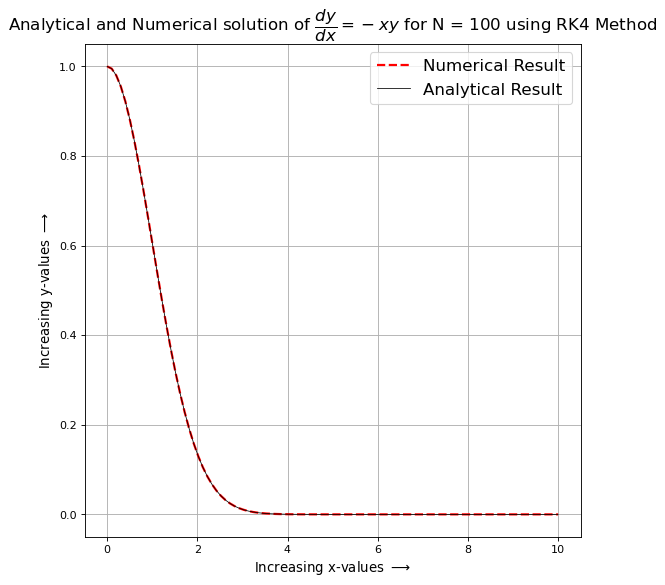

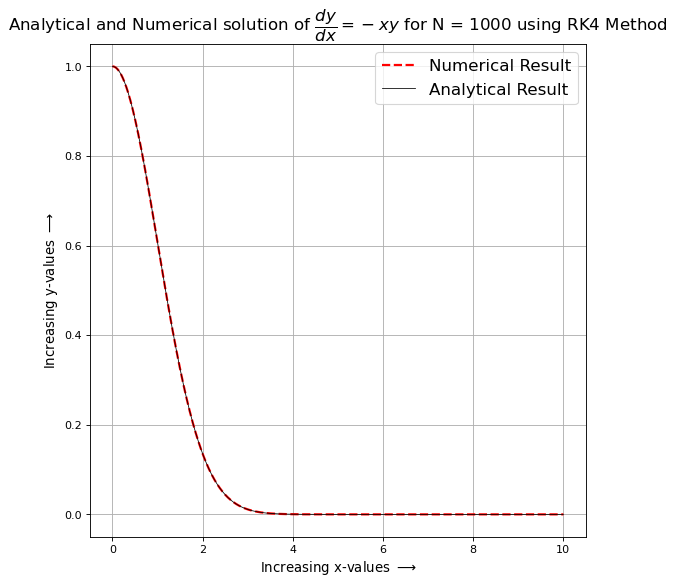

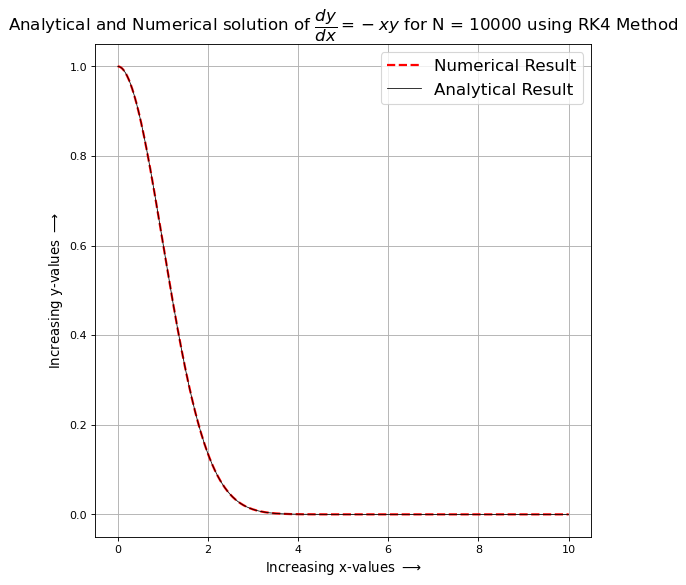

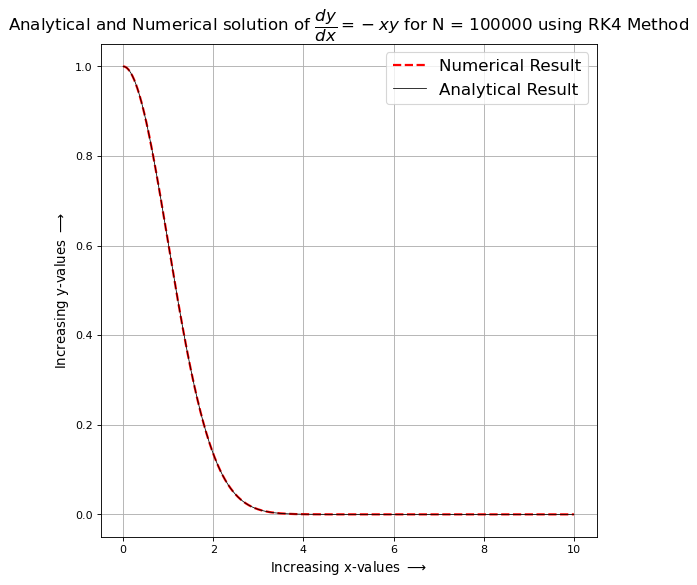

In [48]:
N = np.array([100,1000,10000,100000])
l1_arr_rk4 = np.array([])
l2_arr_rk4 = np.array([])

for n in N:
    x_vals = np.linspace(0,10,n)
    y_num = rk4(x_vals,1,func_1)
    y_ana = np.exp(-(x_vals**2)/2)
    
    l1 = np.sum(abs(y_ana - y_num))/n
    l1_arr_rk4 = np.append(l1_arr_rk4,l1)
    l2 = np.sqrt(np.sum((y_ana - y_num)**2)/n)
    l2_arr_rk4 = np.append(l2_arr_rk4,l2)

    plt.figure(figsize=(8,8),dpi=80)
    plt.plot(x_vals,y_num,'r--',lw=2,label="Numerical Result")
    plt.plot(x_vals,y_ana,'k-',lw=0.7,label="Analytical Result")
    plt.xlabel("Increasing x-values $\longrightarrow$",fontsize=12)
    plt.ylabel("Increasing y-values $\longrightarrow$",size = 12)
    plt.grid()
    plt.title("Analytical and Numerical solution of $\dfrac{dy}{dx} = -xy$ for N = %d using RK4 Method" %n,fontsize=15)
    plt.legend(prop={'size': 15})

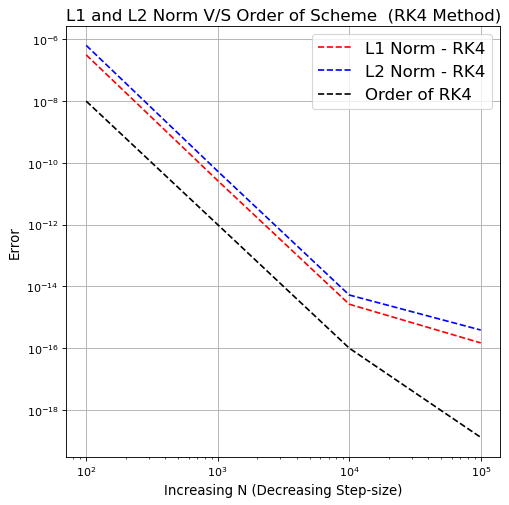

In [49]:
plt.figure(figsize=(7,7),dpi=80)
plt.plot(N,l1_arr_rk4,'r--',label='L1 Norm - RK4')
plt.plot(N,l2_arr_rk4,'b--',label='L2 Norm - RK4')
plt.plot(N,1/(N**4),'k--',label='Order of RK4')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Increasing N (Decreasing Step-size)",size=12)
plt.ylabel("Error",size=12)
plt.title("L1 and L2 Norm V/S Order of Scheme  (RK4 Method)",size=15)
plt.grid()
plt.legend(prop={'size': 15})

In [50]:
print(l1_arr,l1_arr_rk,l1_arr_rk4)

[3.30824968e-03 3.16935036e-04 3.15571589e-05 3.15435253e-06] [1.09710121e-04 9.77715900e-07 9.67322505e-09 9.66294167e-11] [3.15186406e-07 2.66009081e-11 2.64669862e-15 1.47707321e-16]


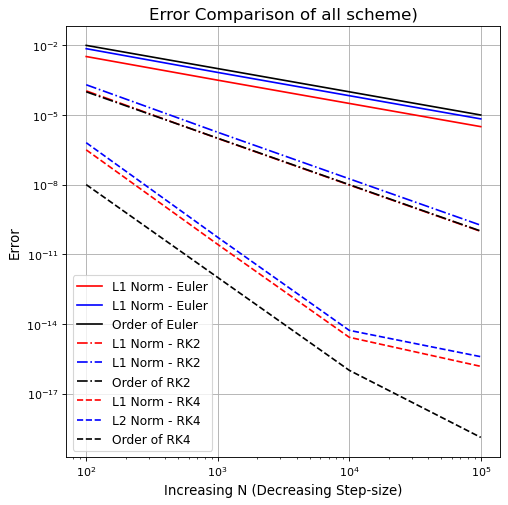

In [51]:
plt.figure(figsize=(7,7),dpi=80)
plt.plot(N,l1_arr,'r',label='L1 Norm - Euler')
plt.plot(N,l2_arr,'b',label='L1 Norm - Euler')
plt.plot(N,1/N,'k',label='Order of Euler')

plt.plot(N,l1_arr_rk,'r-.',label='L1 Norm - RK2')
plt.plot(N,l2_arr_rk,'b-.',label='L1 Norm - RK2')
plt.plot(N,1/N**2,'k-.',label='Order of RK2')

plt.plot(N,l1_arr_rk4,'r--',label='L1 Norm - RK4')
plt.plot(N,l2_arr_rk4,'b--',label='L2 Norm - RK4')
plt.plot(N,1/(N**4),'k--',label='Order of RK4')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Increasing N (Decreasing Step-size)",size=12)
plt.ylabel("Error",size=12)
plt.title("Error Comparison of all scheme)",size=15)
plt.grid()
plt.legend(prop={'size': 11})

## $\text{Problem 2}$

In [52]:
def func_2(x,y,w,a=5.0,e=0.8):
    return (w,-y + (1/(a*(1-e**2))))

In [53]:
def euler_2nd_order(x,i1,i2,function):
    y = np.zeros(len(x))
    w = np.zeros(len(x))
    h = x[1] - x[0]
    y[0] = i1
    w[0] = i2
    
    for i in range(len(x)-1):
        y[i+1] = y[i] + (h*(function(x[i],y[i],w[i])[0]))
        w[i+1] = w[i] + (h*(function(x[i],y[i],w[i])[1]))
        
    return y,w

In [54]:
def semi_imp_euler(x,i1,i2,function):
    y = np.zeros(len(x))
    w = np.zeros(len(x))
    h = x[1] - x[0]
    y[0] = i1
    w[0] = i2
    
    for i in range(len(x)-1):
        y[i+1] = y[i] + (h*(function(x[i],y[i],w[i])[0]))
        w[i+1] = w[i] + (h*(function(x[i],y[i+1],w[i])[1]))
        
    return y,w

In [55]:
def rk2_2nd_order(x,i1,i2,function):
    y = np.zeros(len(x))
    w = np.zeros(len(x))
    h = x[1] - x[0]
    y[0] = i1
    w[0] = i2
    
    for i in range(len(x)-1):
        k1 = h*(function(x[i],y[i],w[i])[1])
        l1 = h*(function(x[i],y[i],w[i])[0])
        k2 = h*(function(x[i] + (0.5*h),y[i] + (0.5*k1),w[i] + (0.5*l1))[1])
        l2 = h*(function(x[i]+ (0.5*h),y[i]+ (0.5*k1),w[i]+(0.5*l1))[0])
        
        y[i+1] = y[i] + l2
        w[i+1] = w[i] + k2
        
    return y,w

In [56]:
#Defining the initial values in Cartesian coordinates------------------------

a , e = 5.0, 0.8

x_initials,y_initials,z_initials = a*(1-e),0.0,0.0

v_x_initials, v_y_initials, v_z_initials = 0.0, 1.0, 0.0

n = 5
phi = np.linspace(0,2*n*np.pi,500)

m1 = m2 = 1
mu = m1*m2/(m1+m2)

position_vector = np.array([x_initials,y_initials,z_initials])
velocity_vector = np.array([v_x_initials,v_y_initials,v_z_initials])

ang_moment = mu*np.cross(position_vector,velocity_vector)
#ang_moment = ang_moment[ang_moment != 0][0]
ang_moment = np.sqrt(np.dot(ang_moment,ang_moment))

position_mag = np.sqrt(np.dot(position_vector,position_vector))
velocity_mag = np.sqrt(np.dot(velocity_vector,velocity_vector))

unit_pos_vector = position_vector/position_mag

r_inverse_initial = 1/position_mag

radial_velocity = np.dot(unit_pos_vector,velocity_vector)
r_vel_inverse_initial = -mu*radial_velocity/ang_moment

initial_vals = [r_inverse_initial,r_vel_inverse_initial]
print(initial_vals)

#initial_vals = [1,1]
#SOLUTIONS BELOW--------------------------------------------------------------------------

#Euler Method Solution------------------------------------
total_result = euler_2nd_order(phi,initial_vals[0],initial_vals[1],func_2)[0]

r_inverse_points = total_result
r_points = 1/r_inverse_points

#Semi Euler Method Solution------------------------------------
total_result_sme = semi_imp_euler(phi,initial_vals[0],initial_vals[1],func_2)[0]

r_inverse_points_sme = total_result_sme
r_points_sme = 1/r_inverse_points_sme

#RK2 Method Solution------------------------------------
total_result_rk2 = rk2_2nd_order(phi,initial_vals[0],initial_vals[1],func_2)[0]

r_inverse_points_rk2 = total_result_rk2
r_points_rk2 = 1/r_inverse_points_rk2

#Analytical Solution------------------------------------
r_ana = (a*(1-e**2))/(1+e*np.cos(phi))

[1.0000000000000002, -0.0]


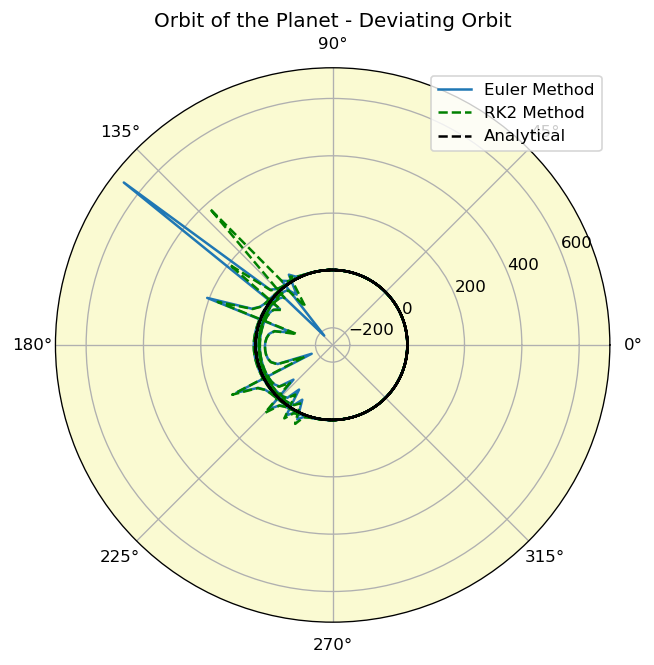

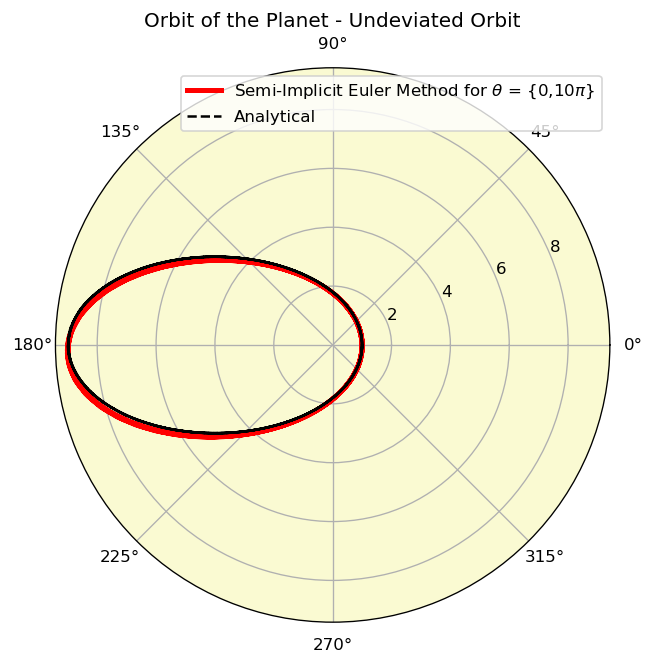

In [57]:
#PLOTTING BELOW---------------------------------------------------------------------------

#PLOT 1
fig = plt.figure(figsize=(6,6),dpi=120)
ax = fig.add_subplot(projection="polar", facecolor="lightgoldenrodyellow")

ax.plot(phi,r_points,label='Euler Method')
ax.plot(phi,r_points_rk2,'g--',label='RK2 Method')
ax.plot(phi,r_ana,'k--',label='Analytical')
ax.set_title('Orbit of the Planet - Deviating Orbit')
plt.legend()


# PLOT 2
fig = plt.figure(figsize=(6,6),dpi=120)
ax = fig.add_subplot(projection="polar", facecolor="lightgoldenrodyellow")

ax.plot(phi,r_points_sme,'r',lw=3,label='Semi-Implicit Euler Method for $\\theta$ = {0,%d$\pi$}'%(2*n))
ax.plot(phi,r_ana,'k--',label='Analytical')
ax.set_title('Orbit of the Planet - Undeviated Orbit')
plt.legend()

## $\text{Problem 3}$

In [58]:
def func_3(x,y,z):
    return (-z*(y**(2/3))/(x**2),(x**2)*y)

In [59]:
def euler_2nd_order(x,i1,i2,function):
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    h = x[1] - x[0]
    y[0] = i1
    z[0] = i2
    
    for i in range(len(x)-1):
        y[i+1] = y[i] + (h*(function(x[i],y[i],z[i])[0]))
        z[i+1] = z[i] + (h*(function(x[i],y[i],z[i])[1]))
        
    return y,z

In [60]:
print(m_hat[:])
print("\n")
print(rho_hat)

NameError: name 'm_hat' is not defined

In [ ]:
r_hat = np.linspace(0.00001,25,10000)
thres = 1.e-6
m_hat_init = 0
rho_hat_init = 500
mass_arr = np.zeros(len(r_hat))
radius_arr = np.zeros(len(r_hat))
rho_arr = np.zeros(len(r_hat))

rho_hat,m_hat = euler_2nd_order(r_hat,rho_hat_init,m_hat_init,func_3)

for i in range(len(rho_hat)-1):
    if rho_hat[i].isnan() != True :
        radius_arr[i] = r_hat[i]
        mass_arr[i] = m_hat[i]
        rho_arr[i] = rho_hat[i]
        break

print()

plt.figure(figsize=(10,6),dpi=120)
#plt.plot(radius_arr,mass_arr,label='$\hat{M}$ vs $\hat{r}$')
plt.plot(radius_arr,rho_arr,label='$\hat{\\rho}$ vs $\hat{r}$')
plt.xlabel("Increasing Radius ($\hat{r}$)",size=18)
plt.ylabel("Increasing Mass ($\hat{m}$)",size=18)
plt.title("Variation of Mass with Radius",size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.minorticks_on()
plt.grid()
plt.legend(prop={"size":17},facecolor='yellow')
# plt.figure(figsize=(10,6),dpi=120)
# plt.plot(r_hat,m_hat,label='$\hat{M}$ vs $\hat{r}$')
# plt.xlabel("Increasing Radius ($\hat{r}$)",size=18)
# plt.ylabel("Increasing Mass ($\hat{m}$)",size=18)
# plt.title("Variation of Mass with Radius",size=20)
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.minorticks_on()
# plt.grid()
# plt.legend(prop={"size":17},facecolor='yellow')
# plt.figure(figsize=(10,6),dpi=120)
# plt.plot(r_hat,rho_hat,label='$\hat{\\rho}$ vs $\hat{r}$')
# plt.xlabel("Increasing Radius ($\hat{r}$)",size=18)
# plt.ylabel("Increasing $\hat{\\rho}$",size=18)
# plt.title("Variation of $\\rho$ with Radius",size=20)
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.minorticks_on()
# plt.grid()
# plt.legend(prop={"size":17},facecolor='yellow')

In [ ]:
rhoc_vals = np.linspace(0.1,1000,100)
total_mass = np.zeros(len(rhoc_vals))
radii = np.zeros(len(rhoc_vals))
r_hat = np.linspace(0.00001,25,10000)

for i in range(len(rhoc_vals)-1):

    m_hat_init = 0
    rho_hat_init = rhoc_vals[i]
    rho_hat,m_hat = euler_2nd_order(r_hat,rho_hat_init,m_hat_init,func_3)

    for j in range(len(rho_hat)-1):
        if rho_hat[j]*rho_hat[j+1] < 0:
            radius = r_hat[j]
            mass = m_hat[j]
            break
            
    total_mass = np.append(total_mass,mass)
    radii = np.append(radii,radius)
    
plt.figure(figsize=(10,6),dpi=120)
plt.plot(radii,total_mass,label='$\hat{M}$ vs $\hat{r}$')
plt.xlabel("Increasing Radius ($\hat{r}$)",size=18)
plt.ylabel("Increasing Total Mass ($\hat{m}$)",size=18)
plt.title("Variation of Total Mass with Radius",size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.minorticks_on()
plt.grid()
plt.legend(prop={"size":17},facecolor='yellow')